In [24]:
import numpy as np
from sklearn.neighbors import KDTree
from sklearn.neighbors import BallTree
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pickle
import time
from scipy.linalg import sqrtm
from numba import jit

In [29]:
line_cov = np.random.randint(10, size=2)
print(line_cov)
print(np.flip(line_cov))

[6 0]
[0 6]


We define our data

C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  
C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  
C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  
C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  
C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  
C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  
C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  
C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not po

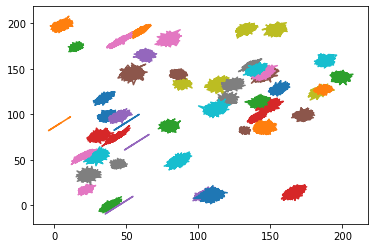

In [36]:
X = np.empty((0,0))
data=[]
n = 50
for i in range(n):
    mean = np.random.randint(200, size=2)
    line_cov = np.random.randint(10, size=2)
    cov = np.array([line_cov, np.flip(line_cov)])
    x = np.random.multivariate_normal(mean, cov, 1000)
    X = np.append(X,np.array([mean[0],mean[1],cov[0][0],cov[1][0],cov[1][1]]))
    data.append(x)
    plt.plot(x[:,0],x[:,1])
plt.show()
X = X.reshape(n,5)

We define the Wasserstein metric

In [42]:
from sklearn.neighbors import DistanceMetric
from numpy import linalg as LA
def wasserstein(x, y):
    mean_x = np.array(x[0:2])
    cov_x = np.array([x[2],x[3],x[3],x[4]]).reshape((2,2))
    #cov_x = np.insert(x[2:], 2, x[3]).reshape((2,2))
    #cov_x = np.array(x[2:6]).reshape(2,2)
    mean_y = np.array(y[0:2])
    cov_y = np.array([y[2],y[3],y[3],y[4]]).reshape((2,2))
    #cov_y = np.insert(y[2:], 2, y[3]).reshape((2,2))
    #cov_y = np.array(y[2:6]).reshape(2,2)
    dist = 0
    dist = LA.norm(mean_x-mean_y)**2
    dist += np.trace(cov_x + cov_y - 2* sqrtm((sqrtm(cov_y)*cov_x*sqrtm(cov_y))))
    return dist

We build the tree with the Wasserstein metric.  
We have to use the BallTree because KDTree is not working with metric not defined by scikit-learn. We also try to remplace the KDTree function by the BallTree function in the test code of Anda and the result was very similar but slightly worst.

In [43]:
number_of_feature = 5
tree = BallTree(X, metric=wasserstein)
dist, ind = tree.query(X[:number_of_feature], k=5) 
print(dist)
print(ind)

[[8.40715718e-02 6.62674752e+01 2.26472723e+02 4.05581521e+02
  5.20348651e+02]
 [3.86460055e+00 3.24688639e+02 5.05306028e+02 6.94718749e+02
  2.13245054e+03]
 [3.55271368e-15 9.24404082e+02 9.44669697e+02 1.32626664e+03
  1.38579044e+03]
 [2.93460671e-01 1.51854157e+02 4.89573911e+02 5.20167854e+02
  5.95055728e+02]
 [1.96432126e+00 2.26012381e+01 1.69299787e+03 3.63830306e+03
  3.97241216e+03]]
[[ 0 14 20 10  3]
 [ 1 46 16 24 35]
 [ 2 20 44 14 49]
 [ 3 43 19  0 20]
 [ 4 30 39 34 33]]


C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
tree = KDTree(X, metric=wasserstein)
dist, ind = tree.query(X[:1], k=5) 
print(dist)
print(ind)

ValueError: metric PyFuncDistance is not valid for KDTree

We can see that our method work. (In blue the data for the gaussian we want, in red the data for the K near gaussian).

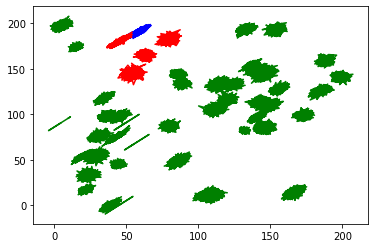

In [44]:
vrai = np.random.randint(number_of_feature)
for i in range(n):
    if(i==vrai):
        plt.plot(data[i][:,0],data[i][:,1],c='blue')
    elif(i in ind[vrai]):
        plt.plot(data[i][:,0],data[i][:,1],c='red')
    else:
        plt.plot(data[i][:,0],data[i][:,1],c='green')

Now we try to use data with approximately the same mean but a covariance very different

C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  


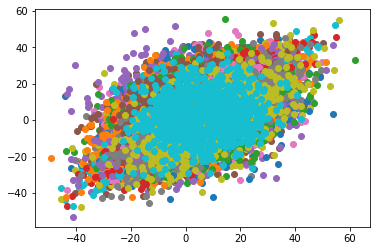

ValueError: cannot reshape array of size 250 into shape (50,6)

In [45]:
X = np.empty((0,0))
data=[]
n = 50
for i in range(n):
    mean = np.random.randint(10, size=2)
    line_cov = np.random.randint(200, size=2)
    cov = np.array([line_cov, np.flip(line_cov)])
    x = np.random.multivariate_normal(mean, cov, 1000)
    #X = np.append(X,np.concatenate([mean,cov[0],cov[1]]))
    X = np.append(X,np.array([mean[0],mean[1],cov[0][0],cov[1][0],cov[1][1]]))
    data.append(x)
    plt.scatter(x[:,0],x[:,1])
plt.show()
X = X.reshape(n,6)

In [8]:
number_of_feature = 5
tree = BallTree(X, metric=wasserstein)
dist, ind = tree.query(X[:number_of_feature], k=3) 
print(dist)
print(ind)

[[-261.60804175 -233.87286495 -219.2072902 ]
 [ -87.47430027  -65.24296636  -54.63394458]
 [  -9.00049743   -3.9300944     2.71937023]
 [   5.24491748   10.07703472   16.61979126]
 [ -20.48208674    5.92483329   12.24762585]]
[[ 0 34 48]
 [ 0 34 48]
 [ 0 48  2]
 [ 2  0 37]
 [48 36 22]]


C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


We can see that it works well also.

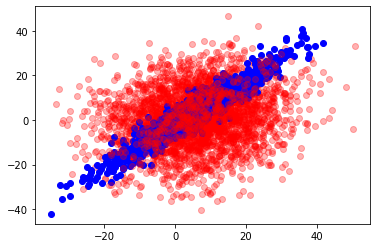

In [9]:
vrai = np.random.randint(number_of_feature)
for i in range(n):
    if(i==vrai):
        plt.scatter(data[i][:,0],data[i][:,1],c='blue')
    elif(i in ind[vrai]):
        plt.scatter(data[i][:,0],data[i][:,1],c='red',alpha=0.3)

One of the main drawbacks of define our own metric is the execution time, we are going to see if it is really a big problem.

In [10]:
X = np.empty((0,0))
time_wasserstein = []
time_euclidean = []
for n in np.logspace(0,5,6):
    X = np.empty((0,0))
    for i in range(int(n)):
        mean = np.random.randint(200, size=2)
        line_cov = np.random.randint(10, size=2)
        cov = np.array([line_cov, np.flip(line_cov)])
        X = np.append(X,np.concatenate([mean,cov[0],cov[1]]))
    X = X.reshape(int(n),6)
    start_time = time.time()
    BallTree(X, metric='manhattan')
    time_wasserstein.append(time.time() - start_time)
    start_time = time.time()
    BallTree(X, metric='euclidean')
    time_euclidean.append(time.time() - start_time)
    print(n)

1.0
10.0
100.0
1000.0
10000.0


KeyboardInterrupt: 

In [ ]:
plt.plot(np.logspace(0,5,6),time_wasserstein,label='Manhattan')
plt.plot(np.logspace(0,5,6),time_euclidean,label="Euclidean")
plt.xscale(value='log')
plt.legend()
plt.title("Execution time in function of the number of samples")
plt.xlabel("Number of samples")
plt.ylabel("Execution time (s)")

We can observe that using our metric is really slow.

So we use a metric which return just a zero (for the test)

In [ ]:
def small(x, y):
    return 0

In [ ]:
X = np.empty((0,0))
time_test = []
for n in np.logspace(0,5,6):
    X = np.empty((0,0))
    for i in range(int(n)):
        mean = np.random.randint(200, size=2)
        line_cov = np.random.randint(10, size=2)
        cov = np.array([line_cov, np.flip(line_cov)])
        X = np.append(X,np.concatenate([mean,cov[0],cov[1]]))
    X = X.reshape(int(n),6)
    start_time = time.time()
    BallTree(X, metric=small)
    time_test.append(time.time() - start_time)
    print(n)

In [ ]:
plt.plot(np.logspace(0,5,6),time_wasserstein,label='Wasserstein')
plt.plot(np.logspace(0,5,6),time_test,label="Euclidean")
plt.plot(np.logspace(0,5,6),time_test,label="Metric test")
plt.xscale(value='log')
plt.legend()
plt.title("Execution time in function of the number of samples")
plt.xlabel("Number of samples")
plt.ylabel("Execution time (s)")

We see that the problem is from our metric. So we need to optimize it in order to use it in real application.

In [11]:
def ellipseToGaussian(x_center,y_center,r_xi,r_eta,alpha_rad):
    mux= x_center
    muy = y_center 
    sigma_xi = (1/6)*r_xi
    sigma_eta = (1/6)*r_eta
    
    cov = 0.5*np.tan(2*alpha_rad)*((sigma_xi**2) - (sigma_eta**2))
    CovMat = np.array([[sigma_eta**2, 0],[0, sigma_xi**2]])
    
    P = np.array([[np.cos(alpha_rad+(np.pi/2)), np.sin(alpha_rad+(np.pi/2))],[-np.sin(alpha_rad+(np.pi/2)), np.cos(alpha_rad+(np.pi/2))]])
    P_1 = np.linalg.inv(P)
    CovMatBis = np.linalg.multi_dot([P_1, CovMat, P])
    mu = np.array([mux,muy])
    
    return mu, CovMatBis


def wasserstein_metric(mu1,mu2,covMat1,covMat2):
    rC2 = sqrtm(covMat2)
    mat = covMat1 + covMat2 - (2*sqrtm(np.linalg.multi_dot([rC2, covMat1, rC2])))   
    wasserstein = np.linalg.norm(mu1-mu2)**2 + np.trace(mat)
    return wasserstein

def hellinger_metric(mu1,mu2,covMat1,covMat2):
    coef = (np.linalg.det(covMat1)**(1/4))*(np.linalg.det(covMat2)**(1/4))/(np.linalg.det(0.5*(covMat1+covMat2)))
    exp_ = np.linalg.multi_dot([np.transpose(mu1-mu2),0.5*(covMat1+covMat2),mu1-mu2])
    hellinger = 1-(coef*np.exp((-1/8)*exp_))
    return hellinger

def KL_div(mu1,mu2,covMat1,covMat2):
    prod = np.linalg.multi_dot([np.transpose(mu2-mu1),np.linalg.inv(covMat2),mu2-mu1])
    tr = np.trace(np.dot(np.linalg.inv(covMat2),covMat1))
    kl = 0.5*(tr + prod - 2 + np.log(np.linalg.det(covMat2)/np.linalg.det(covMat1)))
    return kl

In [12]:
def direction(mean,center_ref,bruit = 0.2):
    dire = center_ref-mean
    dire = dire/LA.norm(dire)
    dire += np.random.randn(2) * bruit
    return dire
    
def vitesse(covMat):
    return sum(sum(abs(covMat)))

def converge_center(mean,covMat,center,bruit = 0.2):
    """renvoie la nouvelle position du tourbillon, le tourbillon va se diriger vers center"""
    dire = direction(mean,center,bruit = bruit)
    vit = vitesse(covMat)
    return mean + vit * dire

def spiral(mean,covMat,bruit = 0.2,alpha = 30):
    """renvoie la nouvelle position du tourbillon, le tourbillon va faire une rotation d'alpha ou une spirale"""
    theta = np.radians(alpha)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    dire = direction(mean, mean.dot(R),bruit=bruit)
    vit = vitesse(covMat)
    return mean + vit * dire

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as pat
from scipy.linalg import sqrtm
from numpy import linalg as LA

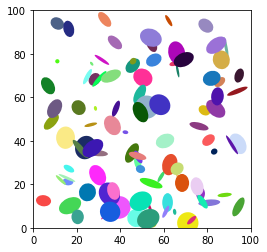

In [14]:
num_ellipses = 100

ellipses = []
for i in range(num_ellipses):
    x_center = (num_ellipses-5)*np.random.random_sample() + 1
    y_center = (num_ellipses-5)*np.random.random_sample() + 1 
    r_xi = 10*np.random.random_sample() + 1
    r_eta = 10*np.random.random_sample() + 1
    alpha = np.random.rand()*360
    alpha_rad = np.radians(alpha)
    ellipse = np.array([x_center,y_center,r_xi,r_eta,alpha,alpha_rad])
    ellipses.append(ellipse)
    
color = np.random.rand(num_ellipses,3)

ellipses_obj = []
for ellipse in ellipses:
    ellipse_obj_ = pat.Ellipse((ellipse[0],ellipse[1]), ellipse[2],ellipse[3], ellipse[4])
    ellipses_obj.append(ellipse_obj_)
fig = plt.figure(0)

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(0, num_ellipses)
ax.set_ylim(0, num_ellipses)

for i in range(num_ellipses):
    ax.add_artist(ellipses_obj[i])
    ellipses_obj[i].set_facecolor(color[i])
    
ellipses_g =[]

for ellipse in ellipses:
    ellipse_g = ellipseToGaussian(ellipse[0],ellipse[1],ellipse[2],ellipse[3],ellipse[5])
    ellipses_g.append(np.concatenate([np.asarray(ellipse_g[0]),np.asarray(ellipse_g[1].reshape(1,4))[0]]))
ellipses_g = np.asarray(ellipses_g)

In [15]:
number_of_feature = 5
tree = BallTree(ellipses_g, metric=wasserstein)
dist, ind = tree.query(ellipses_g[:number_of_feature], k=5) 
print(dist)
print(ind)

[[1.49476692e-03 1.40285501e+01 2.05452267e+01 4.75473386e+01
  5.73072024e+01]
 [1.85920116e-02 5.15882414e+01 6.23745102e+01 7.84467375e+01
  9.01929264e+01]
 [2.95698062e-02 5.38402805e+01 8.88018405e+01 1.20597468e+02
  1.61354374e+02]
 [1.75598454e-04 7.52004795e+01 9.59829169e+01 1.05393148e+02
  1.72113917e+02]
 [3.73474273e-01 5.83817357e+00 2.18464371e+01 6.19716035e+01
  7.29169761e+01]]
[[ 0 63 86 54 52]
 [ 1  7 16 41 21]
 [ 2 19 12 75 28]
 [ 3 45 13 32 27]
 [ 4 91 97 92 81]]


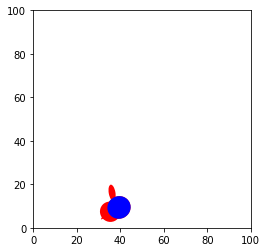

In [16]:
vrai = np.random.randint(number_of_feature)
fig = plt.figure(0)

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(0, num_ellipses)
ax.set_ylim(0, num_ellipses)

ellipses_w = []
for indice in ind[vrai]:
    ellipse_w = pat.Ellipse((ellipses[indice][0],ellipses[indice][1]), ellipses[indice][2],ellipses[indice][3], ellipses[indice][4]) 
    ellipses_w.append(ellipse_w)
    
for ellipse in ellipses_w:
    ax.add_artist(ellipse)
    ellipse.set_facecolor([1,0,0])
    
e_obs_o = pat.Ellipse((ellipses[vrai][0],ellipses[vrai][1]), ellipses[vrai][2],ellipses[vrai][3], ellipses[vrai][4])  
ax.add_artist(e_obs_o)
e_obs_o.set_facecolor([0,0,1])

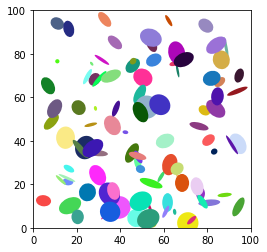

In [17]:
ellipses_obj = []
for ellipse in ellipses:
    ellipse_obj_ = pat.Ellipse((ellipse[0],ellipse[1]), ellipse[2],ellipse[3], ellipse[4])
    ellipses_obj.append(ellipse_obj_)
fig = plt.figure(0)

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(0, num_ellipses)
ax.set_ylim(0, num_ellipses)

for i in range(num_ellipses):
    ax.add_artist(ellipses_obj[i])
    ellipses_obj[i].set_facecolor(color[i])
    
ellipses_g =[]

for ellipse in ellipses:
    ellipse_g = ellipseToGaussian(ellipse[0],ellipse[1],ellipse[2],ellipse[3],ellipse[5])
    ellipses_g.append(np.concatenate([np.asarray(ellipse_g[0]),np.asarray(ellipse_g[1].reshape(1,4))[0]]))
ellipses_g = np.asarray(ellipses_g)

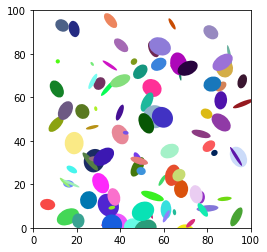

In [18]:
ellipses_g_next = []


for ellipse_g in ellipses_g:
    mean = np.array(ellipse_g[0:2])
    covMat = np.array(ellipse_g[2:6]).reshape(2,2)
    new_mean = spiral(mean,covMat)
    ellipses_g_next.append(np.concatenate([new_mean,covMat.reshape(1,4)[0]]))

ellipses_g_next = np.asarray(ellipses_g_next)

ellipses_obj_next = []
for i in range(len(ellipses)):
    ellipse = ellipses[i]
    ellipse_obj_ = pat.Ellipse((ellipses_g_next[i][0],ellipses_g_next[i][1]), ellipse[2],ellipse[3], ellipse[4])
    ellipses_obj_next.append(ellipse_obj_)
fig = plt.figure(0)

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(0, num_ellipses)
ax.set_ylim(0, num_ellipses)

for i in range(num_ellipses):
    ax.add_artist(ellipses_obj_next[i])
    ellipses_obj_next[i].set_facecolor(color[i])

In [19]:
number_of_feature = 5
tree = BallTree(ellipses_g_next, metric=wasserstein)
dist_next, ind_next = tree.query(ellipses_g_next[:number_of_feature], k=5) 
print(dist_next)
print(ind_next)

[[1.49476692e-03 4.12625823e+00 2.73446949e+01 5.97374729e+01
  6.97575704e+01]
 [1.85920116e-02 4.75903191e+01 8.51491359e+01 1.28938487e+02
  1.76328004e+02]
 [2.95698062e-02 1.01340546e+02 1.04077510e+02 1.07537761e+02
  1.59147126e+02]
 [1.75598454e-04 1.24598456e+02 1.28141939e+02 1.45905570e+02
  1.50269007e+02]
 [3.73474273e-01 5.68608800e+00 1.87490700e+01 3.52558099e+01
  6.54790853e+01]]
[[ 0 86 54 20 63]
 [ 1 16  7 21 22]
 [ 2 12 75 19 94]
 [ 3 27 45 13 10]
 [ 4 91 97 92 76]]


In [21]:
print(ind)

[[ 0 63 86 54 52]
 [ 1  7 16 41 21]
 [ 2 19 12 75 28]
 [ 3 45 13 32 27]
 [ 4 91 97 92 81]]


In [22]:
print(ind_next)

[[ 0 86 54 20 63]
 [ 1 16  7 21 22]
 [ 2 12 75 19 94]
 [ 3 27 45 13 10]
 [ 4 91 97 92 76]]
